In [1]:
import geopandas as gpd

# Obtener un mapa

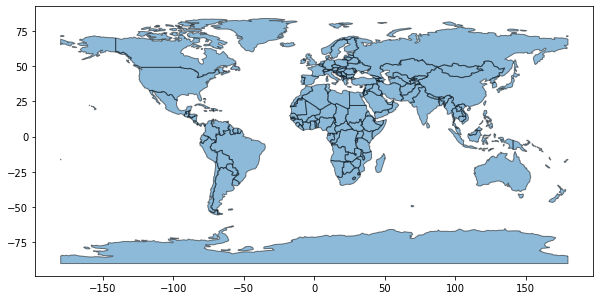

In [2]:
# Obtener un mapa
df = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Obtener puntos aleatorios
Obtenido e inspirado de [StackExchange](https://gis.stackexchange.com/questions/294394/randomly-sample-from-geopandas-dataframe-in-python)

In [3]:
from shapely.geometry import Point
import random

In [4]:
######
def random_points_in_polygon(number, polygon):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro de un polígono 'polygon'.
    """
    points = []
    ptos = min_x, min_y, max_x, max_y = polygon.bounds
    i = 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point
######

In [5]:
######
def random_points_in_geodataframe_v1(number, gdf):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro 
    de un GeoDataFrame 'gdf'. Versión 1.
    """
    N = len(gdf)
    points = []
    i = 0
    while i < number:
        # País aleatorio
        j = random.randint(0, N)
        polygon = gdf.iloc[j].geometry
        point = random_points_in_polygon(1, polygon)
        points += point
        i += 1
        
    return points
######

In [6]:
######
def random_points_in_geodataframe_v2(number, gdf):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro 
    de un GeoDataFrame 'gdf'. Versión 2.
    """
    from shapely.ops import cascaded_union
    boundary = cascaded_union(gdf['geometry'])
    points = random_points_in_polygon(number, boundary)    
    return points
######

La segunda versión es mejor, pues el área del país pondera la probabilidad de que un punto aparezca en él.

In [7]:
df_ = df[df["continent"] != "Antarctica"]
df_ = df_[df_["continent"] != "Seven seas (open ocean)"]
# df_ = df_[df_["continent"] == "South America"]
# df__ = df_[df_["name"] == "Chile"]

In [8]:
df_

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [9]:
# Generamos números aleatorios
points = random_points_in_geodataframe_v2(100, df_)

In [10]:
# for i, point in enumerate(points):
#     print("Point {}: ({},{})".format(str(i+1), point.x, point.y))

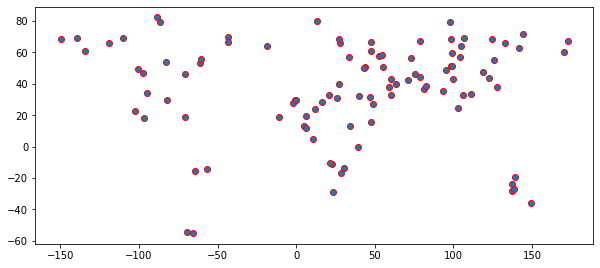

In [11]:
# Hacemos un GeoSeries a partir de los puntos
df_points = gpd.GeoSeries(points)
df_points.plot(figsize=(10, 10), edgecolor='r')

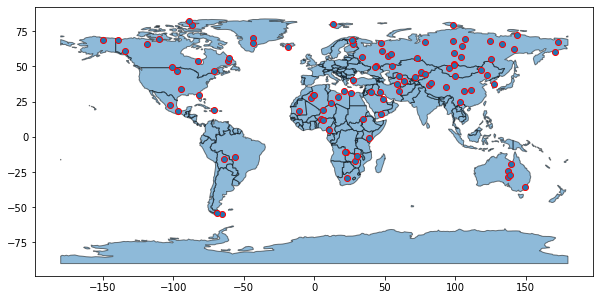

In [12]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_points.plot(figsize=(10, 10), edgecolor='r', ax=ax)

In [13]:
from src.ReMasFrame import ReMasFrame
remas = ReMasFrame()

/opt/conda/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [14]:
import matplotlib.pyplot as plt

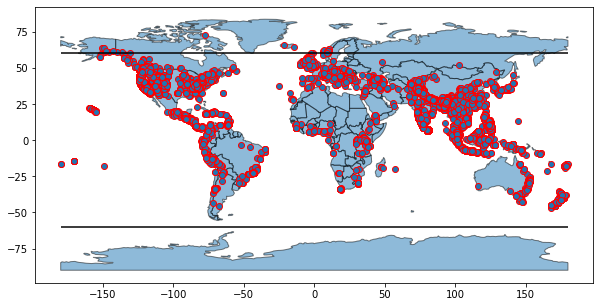

In [15]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
remas.plot(figsize=(10, 10), edgecolor='r', ax=ax)
plt.hlines((-60, 60), -180, 180)

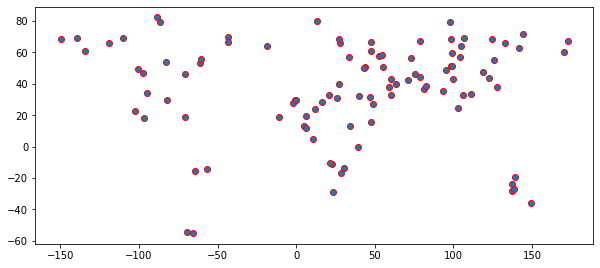

In [16]:
df_points_ = gpd.GeoDataFrame({"geometry": df_points})
df_points_.plot(figsize=(10, 10), edgecolor='r')

# Crear nueva clase de no-landslide

Generar puntos aleatorios 

In [27]:
######
def random_point_in_polygon_v2(point, polygon, verbose=False):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro de un polígono 'polygon'.
    """
#     i = 0
#     while i < number:
#         x_ = point.x + random.uniform(-0.05, 0.05)
#         y_ = point.y + random.uniform(-0.05, 0.05)
#         point = Point(x_, y_)
#         if polygon.contains(point):
#             points.append(point)
#             i += 1
    x_ = point.x + random.uniform(-0.05, 0.05)
    y_ = point.y + random.uniform(-0.05, 0.05)
    point = Point(x_, y_)
        
    i = 0
    while not polygon.contains(point):
        x_ = point.x + random.uniform(-0.05, 0.05)
        y_ = point.y + random.uniform(-0.05, 0.05)
        point = Point(x_, y_)
        
        i += 1
        if i >= 500:
            if verbose: print("No se creó el punto")
            return None
    return point  # returns list of shapely point
######

In [28]:
remas_points = remas["geometry"]
remas_points

0         POINT (107.45000 32.56250)
1        POINT (-122.66300 45.42000)
2        POINT (-75.35870 -11.12950)
3          POINT (81.70800 28.83780)
5         POINT (124.96680 10.70040)
                    ...             
11025    POINT (-122.40994 47.29092)
11026      POINT (44.21141 42.95491)
11027    POINT (-116.77768 47.44917)
11028     POINT (111.67994 -7.85341)
11031      POINT (73.47238 40.88639)
Name: geometry, Length: 8359, dtype: geometry

In [29]:
point = (Point(remas_points[0]))
point.x

107.45

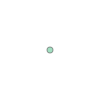

In [30]:
from shapely.ops import cascaded_union
boundary = cascaded_union(df_['geometry'])
random_point_in_polygon_v2(point, boundary)

In [31]:
######
def random_points_in_geodataframe_v3(points_, gdf):
    """
    Genera una lista de 'number' puntos aleatorios que estén dentro 
    de un GeoDataFrame 'gdf'. Versión 2.
    """
    from shapely.ops import cascaded_union
    boundary = cascaded_union(gdf['geometry'])
    points = []
    for point in points_:
        new_point = random_point_in_polygon_v2(point, boundary)
        if new_point is not None:
            points.append(new_point)
    return points
######

In [32]:
points__ = random_points_in_geodataframe_v3(remas_points, df_)

In [33]:
len(points__)

8239

In [42]:
df_points = gpd.GeoSeries(points__)

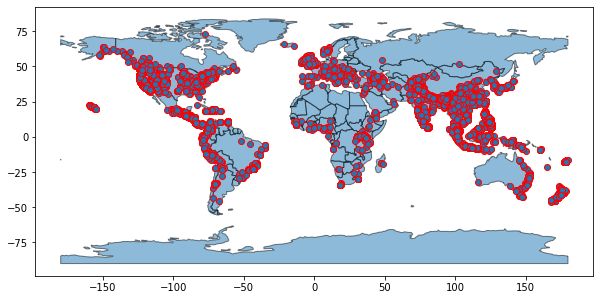

In [35]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_points.plot(figsize=(10, 10), edgecolor='r', ax=ax)

In [43]:
df_points_ = gpd.GeoDataFrame({"geometry": df_points})

In [44]:
import random
import time

def str_time_prop(start, end, format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formated in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))


def random_date(start, end, prop):
    return str_time_prop(start, end, '%Y-%m-%d', prop)

print(random_date("1988-11-07", "2017-09-26", random.random()))

1989-11-20


In [45]:
times = remas["event_date"].map(lambda x: (time.strptime(x, '%Y-%m-%d')))

In [46]:
min(times), max(times)

(time.struct_time(tm_year=1988, tm_mon=11, tm_mday=7, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=312, tm_isdst=-1),
 time.struct_time(tm_year=2017, tm_mon=9, tm_mday=26, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=269, tm_isdst=-1))

In [ ]:
df_points["event_date"] = [
    random_date("2013-10-01", "2013-12-01", random.random()) for _ in df_points_["geometry"]
]

In [ ]:
df_points

In [ ]:
df_points_.to_file("data/no_landslide.shp")

In [ ]:
df_points__ = gpd.read_file(
    "data/no_landslide.shp"
)
df_points__.plot()
df_points__

In [ ]:
times[0] < times[1]

In [ ]:
times = remas["event_date"].map(lambda x: time.mktime(time.strptime(x, '%Y-%m-%d')))
times

In [ ]:
times.hist()

In [39]:
from scipy.stats import beta
rnd = beta(a=5, b=1, )
rnd

In [48]:

df_points_["event_date"] = [
    random_date("2002-11-07", "2017-09-26", random.random()) for _ in df_points_["geometry"]
]
df_points_

,geometry,event_date
0,POINT (107.44581 32.54012),2003-02-26
1,POINT (-122.64160 45.46319),2012-06-29
2,POINT (-75.34435 -11.09618),2014-01-03
3,POINT (81.72099 28.83117),2016-03-25
4,POINT (124.96630 10.70601),2008-07-10
...,...,...
8234,POINT (-122.38579 47.30329),2003-02-25
8235,POINT (44.23409 42.93819),2009-09-27
8236,POINT (-116.73585 47.43972),2015-08-06
8237,POINT (111.72501 -7.88470),2011-10-16


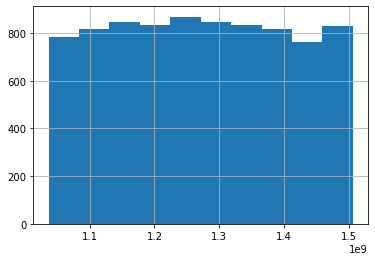

In [49]:
time_points = df_points_["event_date"].map(lambda x: time.mktime(time.strptime(x, '%Y-%m-%d')))

time_points.hist()

In [50]:
df_points_.to_file("data/no_landslide.shp")

In [ ]:
i = 2
df_points_[i:i+1]

In [ ]:
def get_scenes(product, buffer_size, res):
    # Returns start and end date of a 4 day interval
    start_date, end_date = nasa_df.date_interval(nasa_df.event_date[idx_test], delta=10)
    
    scenes, ctx = ReMasFrame.search_scenes(
        nasa_df['geometry'][idx_test].buffer(buffer_size).envelope, 
        product['id'], 
        start_date=start_date, 
        end_date=end_date, 
        limit=10
    )
    
    new_ctx = ctx.assign(resolution=res)
    
    return scenes, new_ctx

In [ ]:
def get_composite(product, buffer_size, res):
    
    scenes, new_ctx = get_scenes(product, buffer_size, res)
    
    arr_stack = scenes.stack(product['bands'], new_ctx)
    composite = np.ma.median(arr_stack, axis=0)
    
    return (scenes, new_ctx), composite

# Choose CHIRPS Daily Precip and correct res
(_, _), composite = get_composite(products['weather']['chirps'], buffer_size=10, res=0.1)

# dl.scenes.save_image('precip_Kyrgyzstan_2017-04-29.png', composite, colormap='viridis', size=5)
dl.scenes.display(composite, colormap='viridis', size=5)